In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Titanic-Dataset.csv')
df.head()

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.drop(columns=['PassengerId','Cabin','Name','Ticket'], errors='ignore')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df=pd.get_dummies(df, columns=['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,True,False,False
2,1,3,female,26.0,0,0,7.9250,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,False,False,True
887,1,1,female,19.0,0,0,30.0000,False,False,True
888,0,3,female,NaN,1,2,23.4500,False,False,True
889,1,1,male,26.0,0,0,30.0000,True,False,False


In [ ]:
df=df.drop(columns=['Sex'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,NaN,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,True
889,False


In [ ]:
df=df.drop_duplicates()
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True


In [ ]:
df['Embarked_C']=df['Embarked_C'].map({True:1,False:0})
df['Embarked_Q']=df['Embarked_Q'].map({True:1,False:0})
df['Embarked_S']=df['Embarked_S'].map({True:1,False:0})
df.head()

/tmp/ipython-input-520201391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked_C']=df['Embarked_C'].map({True:1,False:0})
/tmp/ipython-input-520201391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked_Q']=df['Embarked_Q'].map({True:1,False:0})
/tmp/ipython-input-520201391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Age,95
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


/tmp/ipython-input-3840309127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].mean())


In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
col=['Survived','Pclass','Age','SibSp','Fare']

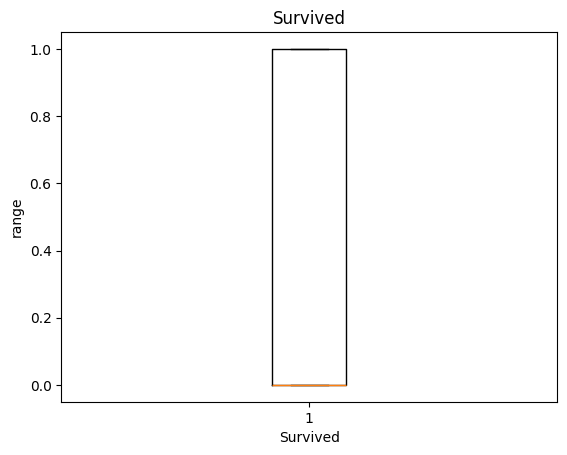

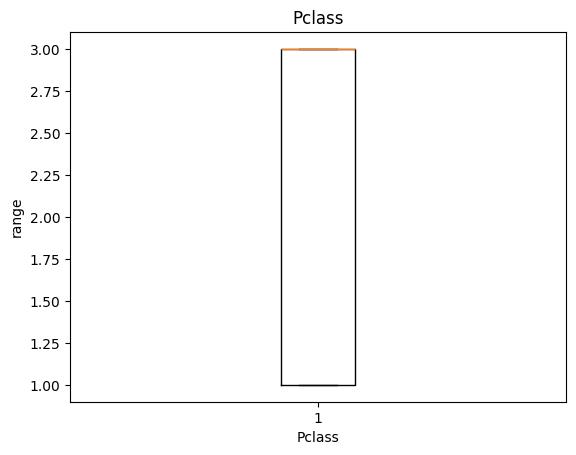

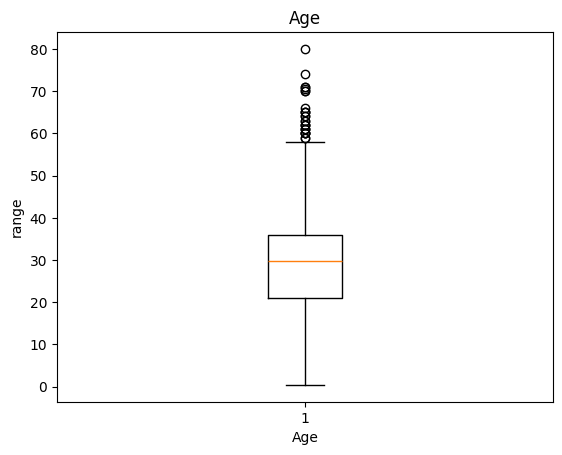

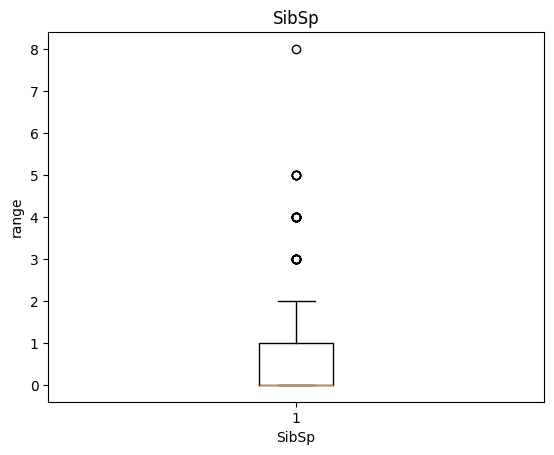

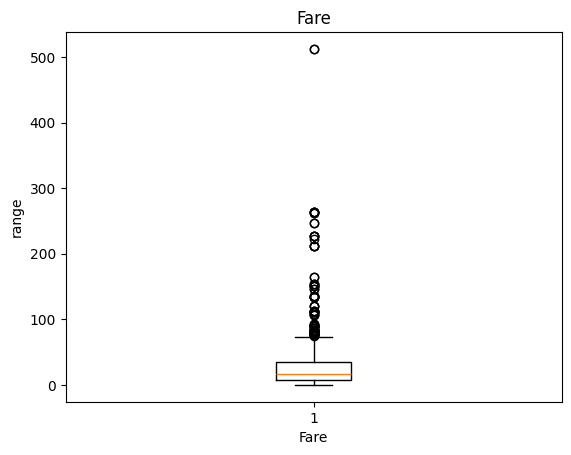

In [ ]:
for i in col:
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [ ]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
for i in col:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  LF = Q1 - 1.5*IQR
  UF = Q3 + 1.5*IQR
  df = df[(df[i] >= LF) & (df[i] <= UF)]

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.258289,-0.180032,0.095595,0.138306,0.268854,0.097024,-0.013567,-0.075590
Pclass,-0.258289,1.000000,-0.295063,-0.018717,0.056325,-0.676697,-0.098399,0.198431,-0.038689
Age,-0.180032,-0.295063,1.000000,-0.126950,-0.118792,0.158807,-0.059658,-0.001507,0.052630
SibSp,0.095595,-0.018717,-0.126950,1.000000,0.247894,0.322564,0.023030,-0.066999,0.021895
Parch,0.138306,0.056325,-0.118792,0.247894,1.000000,0.261384,0.032174,-0.051792,0.004474
Fare,0.268854,-0.676697,0.158807,0.322564,0.261384,1.000000,0.122927,-0.160400,-0.006318
Embarked_C,0.097024,-0.098399,-0.059658,0.023030,0.032174,0.122927,1.000000,-0.130129,-0.785146
Embarked_Q,-0.013567,0.198431,-0.001507,-0.066999,-0.051792,-0.160400,-0.130129,1.000000,-0.511874
Embarked_S,-0.075590,-0.038689,0.052630,0.021895,0.004474,-0.006318,-0.785146,-0.511874,1.000000


<Axes: >

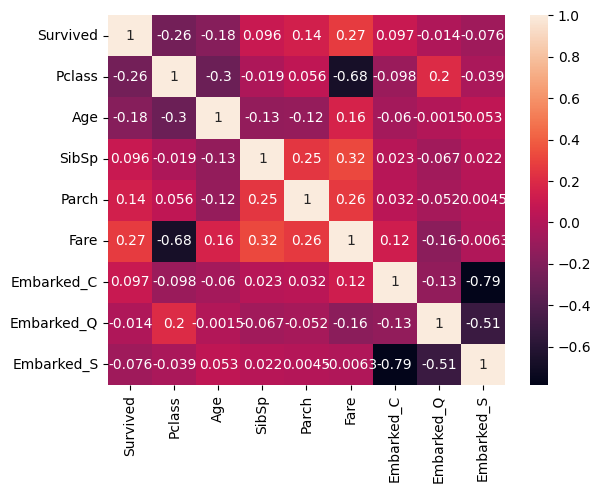

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.shape

(601, 9)

In [ ]:
y=df['Survived']


In [ ]:
X=df.drop(columns=['Survived'])

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,0,1
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,0,0,1
5,3,29.821684,0,0,8.4583,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred_1 = clf.predict(X_train)

In [ ]:
print("TEST ACCURACY:",accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY:",accuracy_score(y_train,y_pred_1))     # clearly overfitting

TEST ACCURACY: 0.5867768595041323
TRAIN ACCURACY: 0.9625


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred_2 = clf.predict(X_train)

In [ ]:
print("TEST ACCURACY:",accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY:",accuracy_score(y_train,y_pred_2))  # clearly overfitting

TEST ACCURACY: 0.5867768595041323
TRAIN ACCURACY: 0.9625


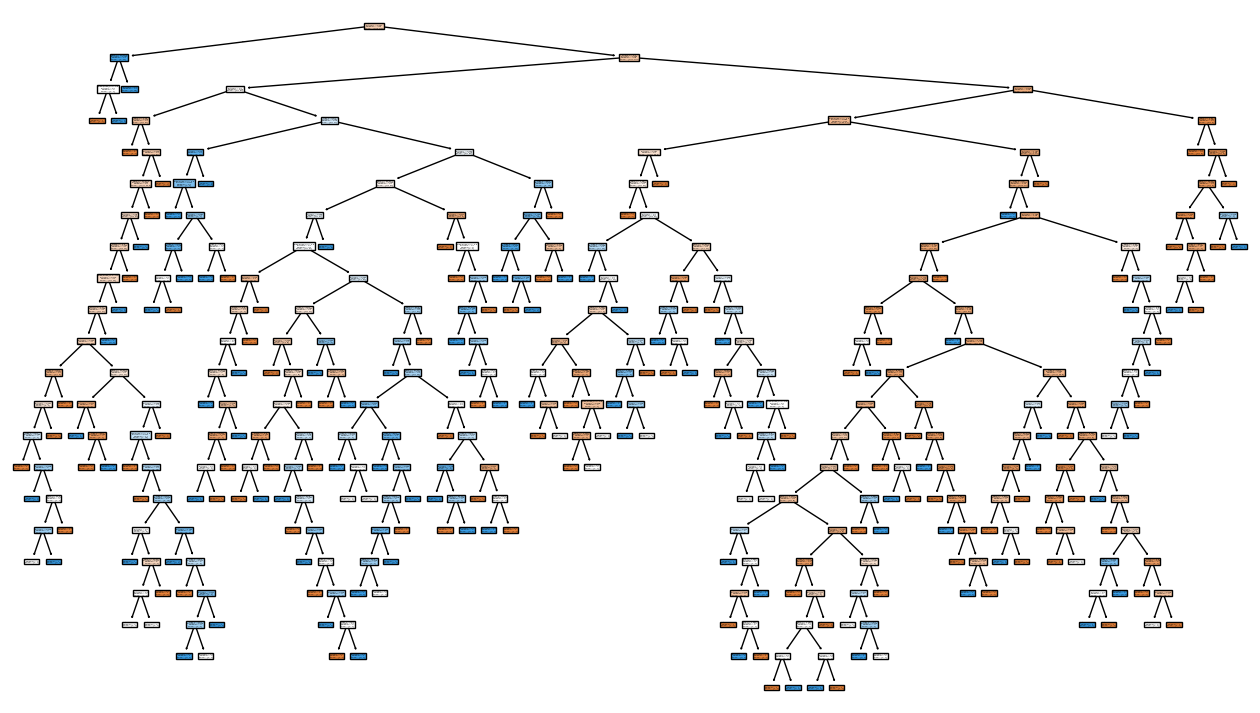

In [ ]:
fig = plt.figure(figsize = (16,9))
fig = tree.plot_tree(clf, feature_names = X.columns, filled = True)

In [ ]:
L=[]
for i in range (1,9):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=4, max_depth=i)

    clf = clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    L.append(accuracy_score(y_test, y_pred))
print(L.index(max(L)))
print(max(L))
print(L)

2
0.7355371900826446
[0.6694214876033058, 0.6694214876033058, 0.7355371900826446, 0.7355371900826446, 0.7272727272727273, 0.628099173553719, 0.6363636363636364, 0.7024793388429752]


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=4, max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7355371900826446

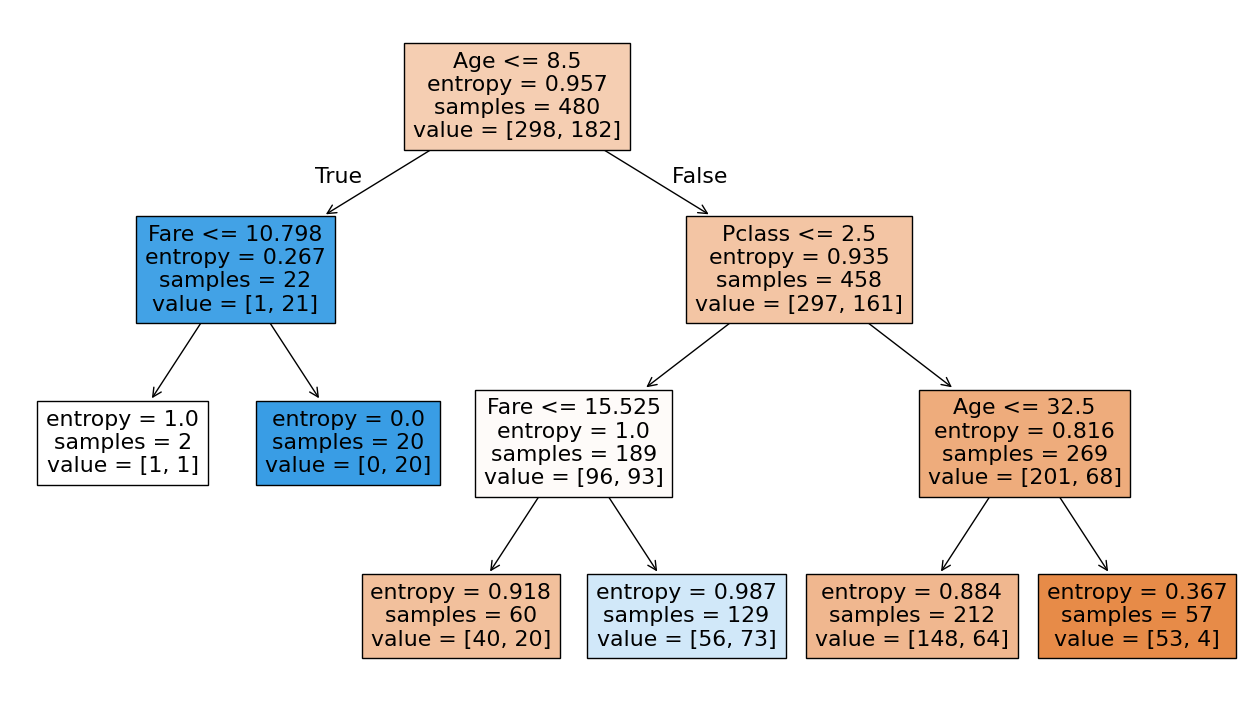

In [ ]:
fig = plt.figure(figsize = (16,9))
fig = tree.plot_tree(clf, feature_names = X.columns, filled = True)

In [ ]:
clf.feature_importances_

array([0.2996917 , 0.54545245, 0.        , 0.        , 0.15485585,
       0.        , 0.        , 0.        ])

Feature: 0, Score: 0.29969
Feature: 1, Score: 0.54545
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.15486
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000


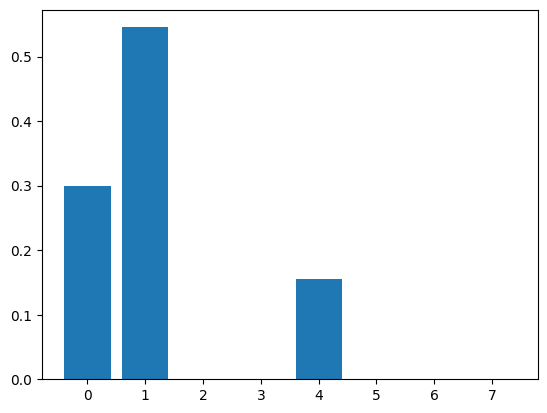

In [ ]:
importance = clf.feature_importances_

for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3,4,5,6,7]}

In [ ]:
dec_tree2 = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(dec_tree2,
             param_grid = params,
             cv = 5)

In [ ]:
grid_model = grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
grid.best_score_

np.float64(0.6604166666666667)

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [ ]:
final_dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
final_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_final = final_dec_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_final)

0.7107438016528925

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Social_Network_Ads.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=pd.get_dummies(df, columns=['Gender'])
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
...,...,...,...,...,...,...
395,15691863,46,41000,1,True,False
396,15706071,51,23000,1,False,True
397,15654296,50,20000,1,True,False
398,15755018,36,33000,0,False,True


In [ ]:
df['Gender_Female']=df['Gender_Female'].map({True:1,False:0})
df['Gender_Male']=df['Gender_Male'].map({True:1,False:0})
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
df=df.drop(columns=['Gender_Male'])
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female
0,15624510,19,19000,0,0
1,15810944,35,20000,0,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,0,0


In [ ]:
y=df['Purchased']
X=df.drop(columns=['Purchased'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.0021256 , 0.0025    , 0.00266667, 0.00285714,
       0.00305556, 0.00325758, 0.0033359 , 0.00444444, 0.00444444,
       0.00461755, 0.0047619 , 0.00488095, 0.005534  , 0.0056968 ,
       0.00581103, 0.00712753, 0.1383975 , 0.17118495])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

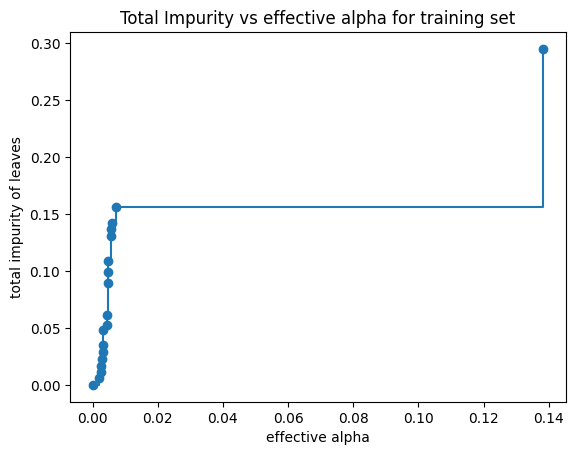

In [ ]:
fig, ax = plt.subplots()
#the maximum effective alpha value is removed, because it is the trivial tree with only one node.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha1 in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha1)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alpha1
    )
)

Number of nodes in the last tree is: 81 with ccp_alpha: 0.0
Number of nodes in the last tree is: 75 with ccp_alpha: 0.0021256038647343
Number of nodes in the last tree is: 71 with ccp_alpha: 0.0025
Number of nodes in the last tree is: 67 with ccp_alpha: 0.002666666666666666
Number of nodes in the last tree is: 63 with ccp_alpha: 0.0028571428571428576
Number of nodes in the last tree is: 59 with ccp_alpha: 0.0030555555555555557
Number of nodes in the last tree is: 55 with ccp_alpha: 0.003257575757575757
Number of nodes in the last tree is: 47 with ccp_alpha: 0.0033359013867488444
Number of nodes in the last tree is: 41 with ccp_alpha: 0.0044444444444444444
Number of nodes in the last tree is: 41 with ccp_alpha: 0.0044444444444444444
Number of nodes in the last tree is: 29 with ccp_alpha: 0.004617552334943638
Number of nodes in the last tree is: 25 with ccp_alpha: 0.004761904761904762
Number of nodes in the last tree is: 21 with ccp_alpha: 0.004880952380952381
Number of nodes in the last

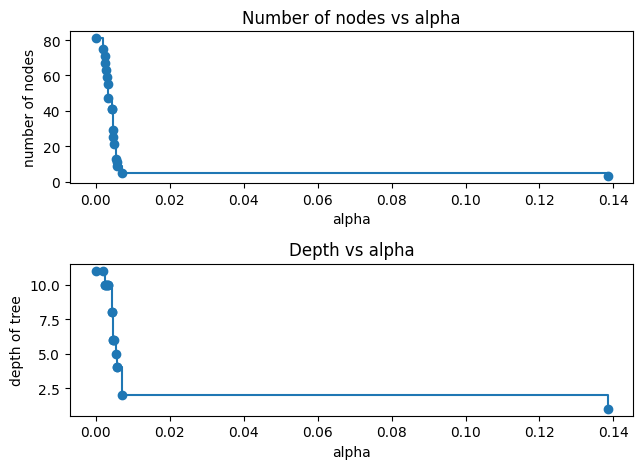

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

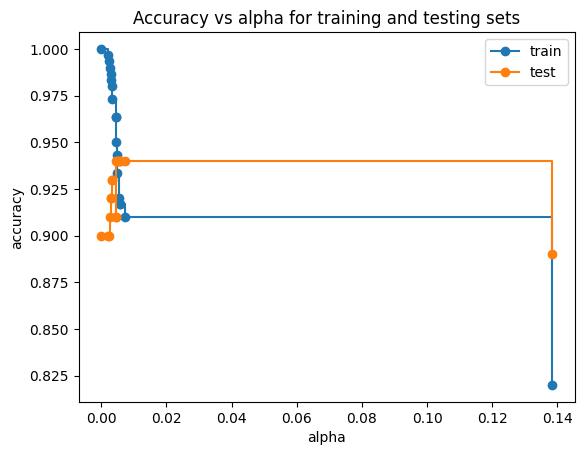

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/bank-full.csv', sep=';')
df.head()

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

X = df.drop(columns=['y'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)              # without regularisation
print("Accuracy without regularization:", accuracy_score(y_test, y_pred))

Accuracy without regularization: 0.8737835446770864


In [ ]:
clf_reg = DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=50, random_state=42)
clf_reg.fit(X_train, y_train)

y_pred_reg = clf_reg.predict(X_test)
print("Accuracy with regularization:", accuracy_score(y_test, y_pred_reg))       # with regularisation

Accuracy with regularization: 0.8995134178708346
